In [2]:
import numpy as np
import matplotlib.cm as cm
import mpl_toolkits.axes_grid1 as axgrid

import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
machine = 'chinook'

if machine=='coho':
    datahalpha = np.load('EAGLE/emission_halpha_L0012N0188_28_test2_SmAb_C2Sm_4000pix_1.562500slice_zcen0.78125_noSFR.npz')['arr_0']
    datalyalpha = np.load('EAGLE/emission_lyalpha_L0012N0188_28_test2_SmAb_C2Sm_4000pix_1.562500slice_zcen0.78125_noSFR.npz')['arr_0']
    dataoiii = np.load('/Users/deblokhorst/Desktop/EAGLE/emission_o3_L0012N0188_28_test2_SmAb_C2Sm_4000pix_1.562500slice_zcen0.78125_noSFR.npz')['arr_0']
elif machine=='chinook':
    datahalpha = np.load('/Users/lokhorst/Desktop/EAGLE/Niagaraoutput/run1/emission_halpha_L0012N0188_28_test2_SmAb_C2Sm_4000pix_1.562500slice_zcen0.78125_noSFR.npz')['arr_0']
    datalyalpha = np.load('/Users/lokhorst/Desktop/EAGLE/Niagaraoutput/run1/emission_lyalpha_L0012N0188_28_test2_SmAb_C2Sm_4000pix_1.562500slice_zcen0.78125_noSFR.npz')['arr_0']
    dataoiii = np.load('/Users/lokhorst/Desktop/EAGLE/Niagaraoutput/run2/emission_o3_L0012N0188_28_test2_SmAb_C2Sm_4000pix_1.562500slice_zcen0.78125_noSFR.npz')['arr_0']

    

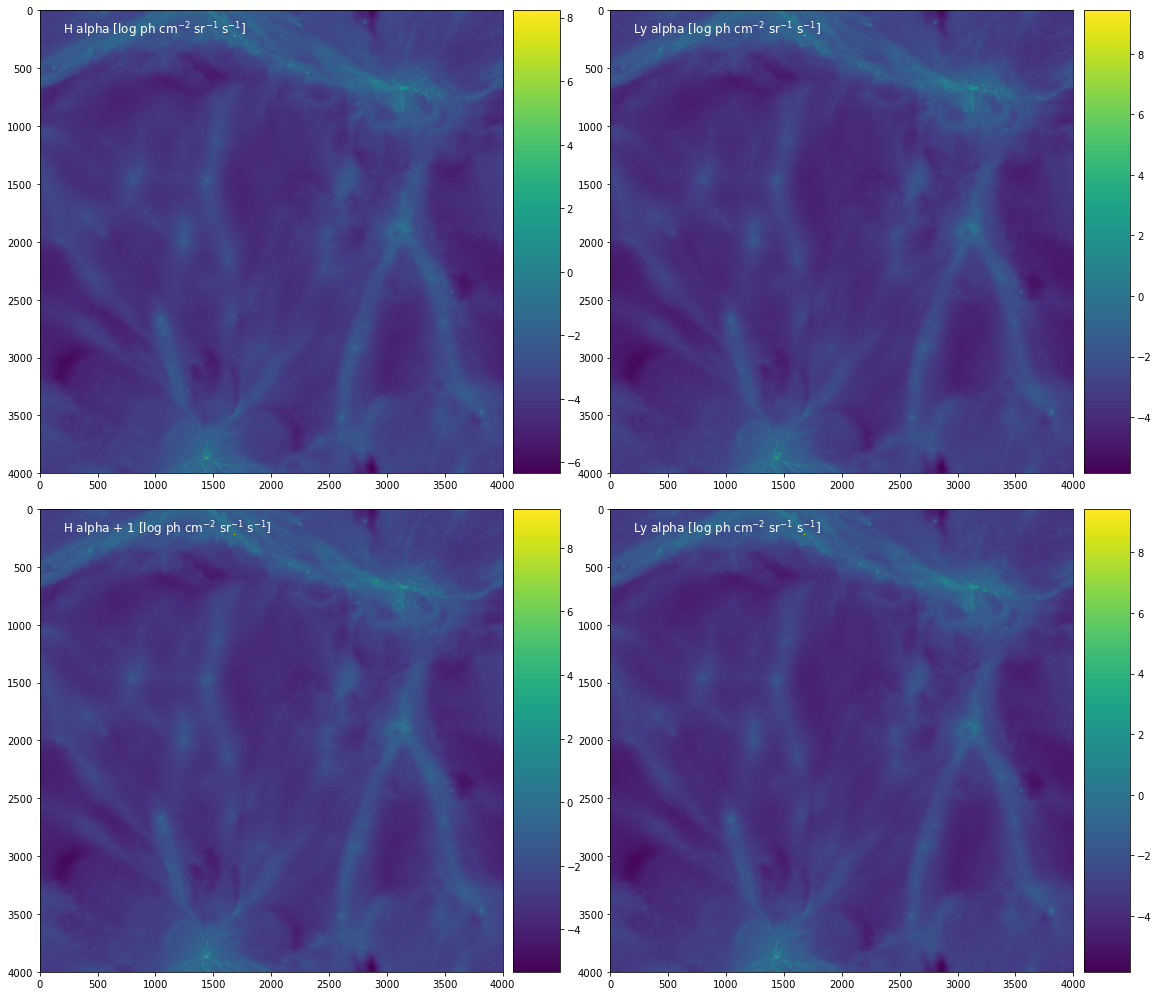

In [4]:
fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(16,14))

def pltcolourbar(img,ax):
    div = axgrid.make_axes_locatable(ax)
    cax = div.append_axes("right",size="10%",pad=0.15)
    cbar = plt.colorbar(img,cax=cax,orientation='vertical')#,boundaries=np.linspace(0,90000))
    cbar.ax.tick_params()

img = ax1.imshow(datahalpha,cmap='viridis')
pltcolourbar(img,ax1)
plt.text(0.05,0.95,r'H alpha [log ph cm$^{-2}$ sr$^{-1}$ s$^{-1}$]',transform=ax1.transAxes,\
         horizontalalignment='left',color='white',fontsize=12)

img = ax2.imshow(datalyalpha,cmap='viridis')
pltcolourbar(img,ax2)
plt.text(0.05,0.95,'Ly alpha [log ph cm$^{-2}$ sr$^{-1}$ s$^{-1}$]',transform=ax2.transAxes,\
         horizontalalignment='left',color='white',fontsize=12)

img = ax3.imshow(datahalpha+1.,cmap='viridis')
pltcolourbar(img,ax3)
plt.text(0.05,0.95,'H alpha + 1 [log ph cm$^{-2}$ sr$^{-1}$ s$^{-1}$]',transform=ax3.transAxes,\
         horizontalalignment='left',color='white',fontsize=12)
# log( a*10 ) = log(a) + log(10) = log(a) + 1

img = ax4.imshow(datalyalpha,cmap='viridis')
pltcolourbar(img,ax4)
plt.text(0.05,0.95,'Ly alpha [log ph cm$^{-2}$ sr$^{-1}$ s$^{-1}$]',transform=ax4.transAxes,\
         horizontalalignment='left',color='white',fontsize=12)

plt.tight_layout()

plt.savefig('halphavslyalpha.png')

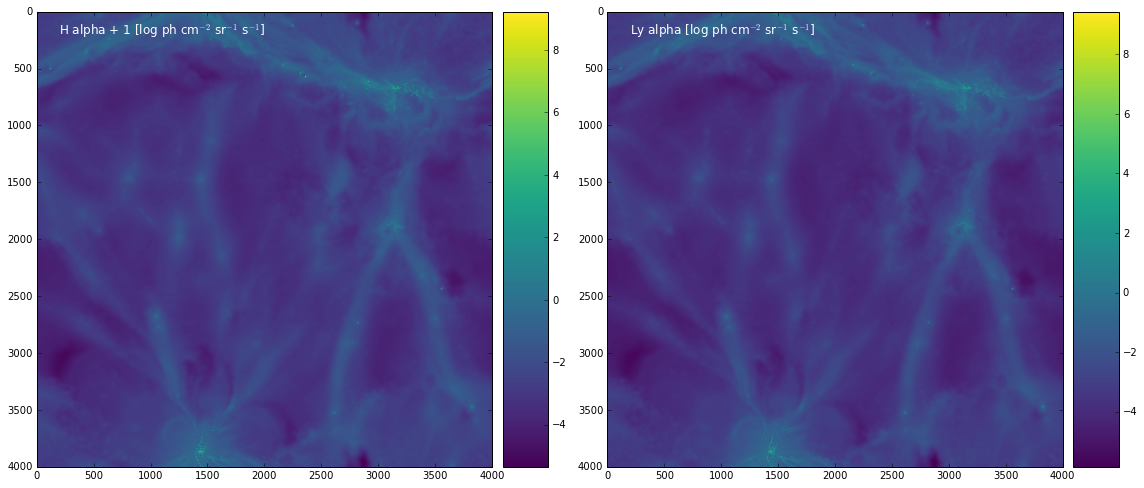

In [6]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,16))

def pltcolourbar(img,ax):
    div = axgrid.make_axes_locatable(ax)
    cax = div.append_axes("right",size="10%",pad=0.15)
    cbar = plt.colorbar(img,cax=cax,orientation='vertical')#,boundaries=np.linspace(0,90000))
    cbar.ax.tick_params()

img = ax1.imshow(datahalpha+1.,cmap='viridis')
pltcolourbar(img,ax1)
plt.text(0.05,0.95,'H alpha + 1 [log ph cm$^{-2}$ sr$^{-1}$ s$^{-1}$]',transform=ax1.transAxes,horizontalalignment='left',color='white',fontsize=12)
# log( a*10 ) = log(a) + log(10) = log(a) + 1

img = ax2.imshow(datalyalpha,cmap='viridis')
pltcolourbar(img,ax2)
plt.text(0.05,0.95,'Ly alpha [log ph cm$^{-2}$ sr$^{-1}$ s$^{-1}$]',transform=ax2.transAxes,horizontalalignment='left',color='white',fontsize=12)


plt.tight_layout()

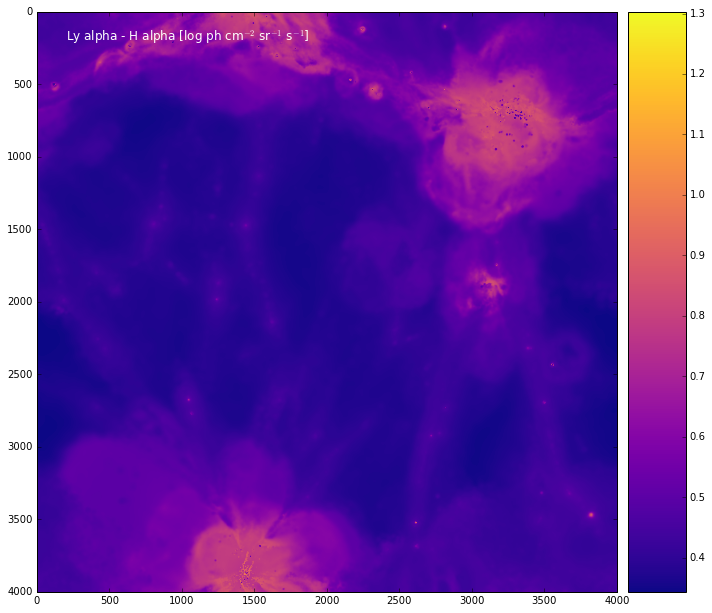

In [8]:
fig,(ax1) = plt.subplots(1,1,figsize=(10,10))

def pltcolourbar(img,ax):
    div = axgrid.make_axes_locatable(ax)
    cax = div.append_axes("right",size="10%",pad=0.15)
    cbar = plt.colorbar(img,cax=cax,orientation='vertical')#,boundaries=np.linspace(0,90000))
    cbar.ax.tick_params()

img = ax1.imshow(datalyalpha-datahalpha,cmap='plasma')
pltcolourbar(img,ax1)
plt.text(0.05,0.95,'Ly alpha - H alpha [log ph cm$^{-2}$ sr$^{-1}$ s$^{-1}$]',transform=ax1.transAxes,horizontalalignment='left',color='white',fontsize=12)
# log( a/b ) = log(a) - log(b)

plt.tight_layout()

plt.savefig('lyalphaminushalpha.png')

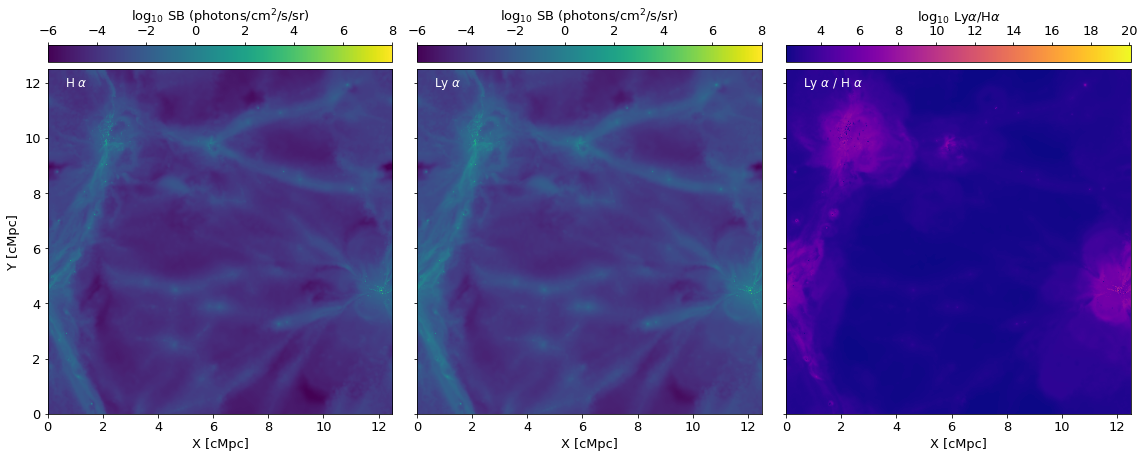

In [6]:
def pltimg(data_FOV,ax,xystarts,size,label=None,colmap = 'viridis',colorbar=True,labelaxes=True,Vmin=None,Vmax=None,clabel = r'log$_{10}$ SB (photons/cm$^2$/s/sr)'):
    ax.patch.set_facecolor(cm.get_cmap(colmap)(0.)) # sets background color to lowest color map value
    img = ax.imshow(data_FOV.T,extent=(xystarts[0],xystarts[0]+size[0],xystarts[1],xystarts[1]+size[1]),\
                    origin='lower', cmap=cm.get_cmap(colmap),interpolation='nearest',vmin=Vmin,vmax=Vmax)

    if labelaxes:
        fontsize=13
        ax.set_xlabel(r'X [cMpc]',fontsize=fontsize)
        ax.set_ylabel(r'Y [cMpc]',fontsize=fontsize)
        ax.locator_params(axis='y', nticks=3)
        ax.tick_params(labelsize=fontsize) #,top=True,labeltop=True)
       # ax.xaxis.set_label_position('top') 
       # ax.xaxis.tick_top()
    else:
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        ax.set_xticks([])
        ax.set_yticks([])
    if colorbar:
        div = axgrid.make_axes_locatable(ax)
        cax = div.append_axes("top",size="5%",pad=0.1)
        cbar = plt.colorbar(img, cax=cax,orientation='horizontal')
        cbar.ax.set_xlabel(r'%s' % (clabel), fontsize=fontsize)
        cbar.ax.tick_params(labelsize=fontsize)
        cbar.ax.xaxis.set_label_position('top') 
        cbar.ax.xaxis.tick_top()
       # cax = div.append_axes("right",size="5%",pad=0.1)
       # cbar = plt.colorbar(img, cax=cax,orientation='vertical')        
    if label is not None:
        ax.text(0.0,0.9,label,transform=ax.transAxes,color='white',fontsize=9)

fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(16,16))

Vmin=-6; Vmax=8
pltimg(datahalpha,ax1,[0,0],[12.5,12.5],label=None,colmap = 'viridis',colorbar=True,labelaxes=True,
       Vmin=Vmin,Vmax=Vmax)
plt.text(0.05,0.95,r'H $\alpha$',transform=ax1.transAxes,\
         horizontalalignment='left',color='white',fontsize=12)

pltimg(datalyalpha,ax2,[0,0],[12.5,12.5],label=None,colmap = 'viridis',colorbar=True,labelaxes=True,
       Vmin=Vmin,Vmax=Vmax)
plt.text(0.05,0.95,r'Ly $\alpha$ ',transform=ax2.transAxes,\
         horizontalalignment='left',color='white',fontsize=12)

pltimg(10**(datalyalpha-datahalpha),ax3,[0,0],[12.5,12.5],label=None,colmap = 'plasma',colorbar=True,labelaxes=True,
      clabel=r'log$_{10}$ Ly$\alpha$/H$\alpha$')
plt.text(0.05,0.95,r'Ly $\alpha$ / H $\alpha$',transform=ax3.transAxes,horizontalalignment='left',color='white',fontsize=12)
# log( a/b ) = log(a) - log(b)

ax2.set_yticklabels([])
ax2.set_ylabel('')
ax3.set_yticklabels([])
ax3.set_ylabel('')

fig.subplots_adjust( wspace=0.)

plt.tight_layout()

plt.savefig('lyalphahalpha_threeplotcomparison.png')

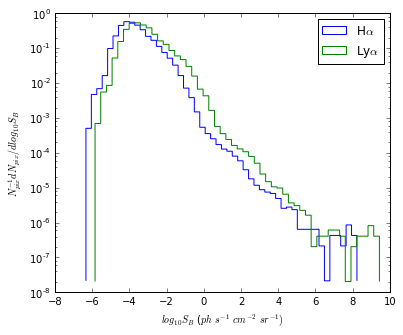

In [3]:
fig = plt.subplots(1,1,figsize=[6,5])
plt.hist(datahalpha.flatten(),bins=50,log='True',normed='True',histtype='step',label=r'H$\alpha$')
plt.hist(datalyalpha.flatten(),bins=50,log='True',normed='True',histtype='step',label=r'Ly$\alpha$')
#plt.hist(data_27.flatten(),bins=50,log='True',normed='True',histtype='step',label='with SF 27')
#plt.hist(data_28.flatten(),bins=50,log='True',normed='True',histtype='step',label='with SF 28')
plt.ylabel(r'$N^{-1}_{pix}dN_{pix}/dlog_{10}S_{B}$')
plt.xlabel(r'$log_{10}S_{B}$ ($ph$ $s^{-1}$ $cm^{-2}$ $sr^{-1})$')
plt.legend()

#plt.savefig('LyalphaHalphaSBcomparison.png')

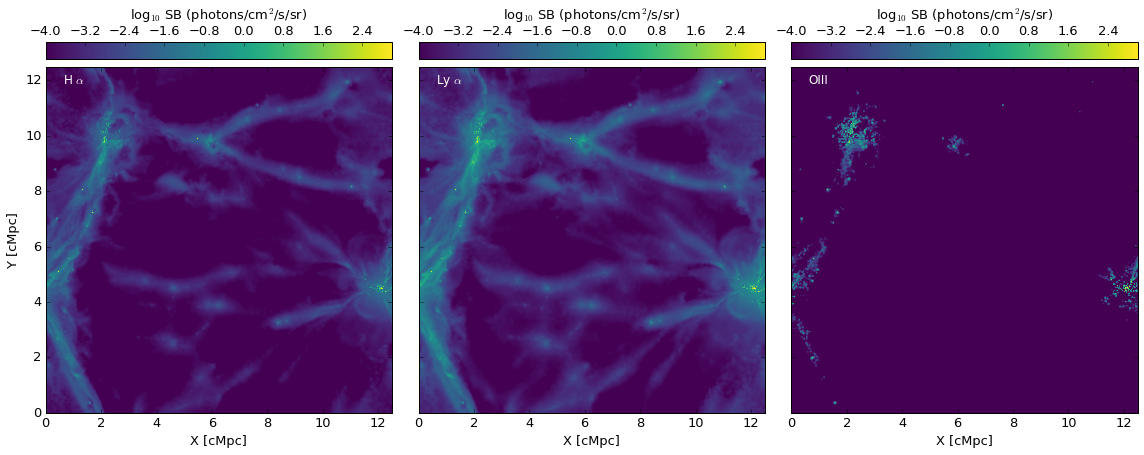

In [15]:
def pltimg(data_FOV,ax,xystarts,size,label=None,colmap = 'viridis',colorbar=True,labelaxes=True,Vmin=None,Vmax=None):
    ax.patch.set_facecolor(cm.get_cmap(colmap)(0.)) # sets background color to lowest color map value
    img = ax.imshow(data_FOV.T,extent=(xystarts[0],xystarts[0]+size[0],xystarts[1],xystarts[1]+size[1]),\
                    origin='lower', cmap=cm.get_cmap(colmap),interpolation='nearest',vmin=Vmin,vmax=Vmax)
    clabel = r'log$_{10}$ SB (photons/cm$^2$/s/sr)'

    if labelaxes:
        fontsize=13
        ax.set_xlabel(r'X [cMpc]',fontsize=fontsize)
        ax.set_ylabel(r'Y [cMpc]',fontsize=fontsize)
        ax.locator_params(axis='y', nticks=3)
        ax.tick_params(labelsize=fontsize) #,top=True,labeltop=True)
       # ax.xaxis.set_label_position('top') 
       # ax.xaxis.tick_top()
    else:
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        ax.set_xticks([])
        ax.set_yticks([])
    if colorbar:
        div = axgrid.make_axes_locatable(ax)
        cax = div.append_axes("top",size="5%",pad=0.1)
        cbar = plt.colorbar(img, cax=cax,orientation='horizontal')
        cbar.ax.set_xlabel(r'%s' % (clabel), fontsize=fontsize)
        cbar.ax.tick_params(labelsize=fontsize)
        cbar.ax.xaxis.set_label_position('top') 
        cbar.ax.xaxis.tick_top()
       # cax = div.append_axes("right",size="5%",pad=0.1)
       # cbar = plt.colorbar(img, cax=cax,orientation='vertical')        
    if label is not None:
        ax.text(0.0,0.9,label,transform=ax.transAxes,color='white',fontsize=9)

fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(16,16))

Vmin=-4; Vmax=3
pltimg(datahalpha,ax1,[0,0],[12.5,12.5],label=None,colmap = 'viridis',colorbar=True,labelaxes=True,
       Vmin=Vmin,Vmax=Vmax)
plt.text(0.05,0.95,r'H $\alpha$',transform=ax1.transAxes,\
         horizontalalignment='left',color='white',fontsize=12)

pltimg(datalyalpha,ax2,[0,0],[12.5,12.5],label=None,colmap = 'viridis',colorbar=True,labelaxes=True,
       Vmin=Vmin,Vmax=Vmax)
plt.text(0.05,0.95,r'Ly $\alpha$ ',transform=ax2.transAxes,\
         horizontalalignment='left',color='white',fontsize=12)

pltimg(dataoiii,ax3,[0,0],[12.5,12.5],label=None,colmap = 'viridis',colorbar=True,labelaxes=True,
       Vmin=Vmin,Vmax=Vmax)
plt.text(0.05,0.95,r'OIII',transform=ax3.transAxes,horizontalalignment='left',color='white',fontsize=12)
# log( a/b ) = log(a) - log(b)

ax2.set_yticklabels([])
ax2.set_ylabel('')
ax3.set_yticklabels([])
ax3.set_ylabel('')

fig.subplots_adjust( wspace=0.)

plt.tight_layout()

#plt.savefig('.png')

In [10]:
dataoiii.shape

(4000, 4000)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:12: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:16: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


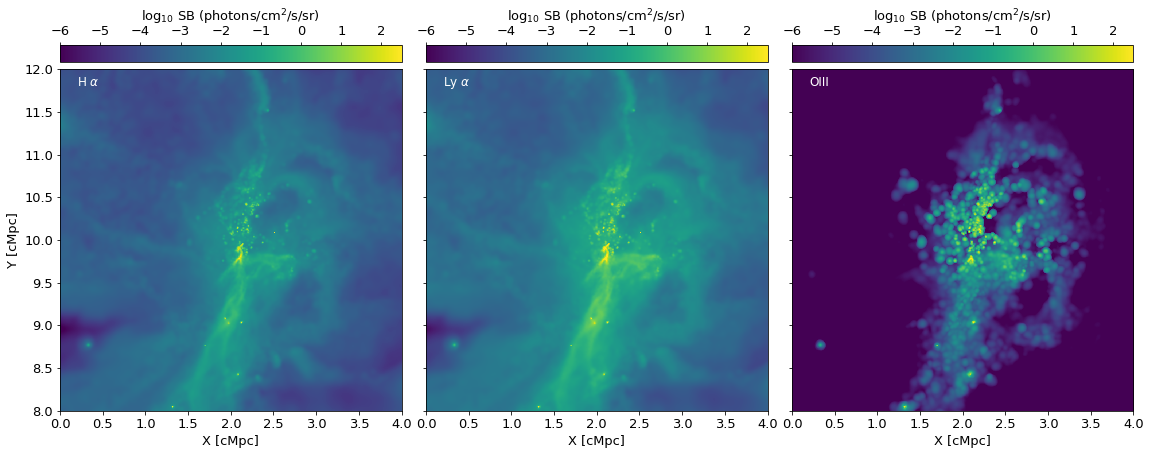

In [13]:
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(16,16))

Vmin=-4; Vmax=1
Vmin=-6; Vmax=2.5

colmap='viridis'

pltimg(datahalpha[0:4./12.5*4000.,8./12.5*4000.:12./12.5*4000.],ax1,[0,8],[4,4],label=None,colmap = colmap,colorbar=True,labelaxes=True,
       Vmin=Vmin,Vmax=Vmax)
plt.text(0.05,0.95,r'H $\alpha$',transform=ax1.transAxes,\
         horizontalalignment='left',color='white',fontsize=12)

pltimg(datalyalpha[0:4./12.5*4000.,8./12.5*4000.:12./12.5*4000.],ax2,[0,8],[4,4],label=None,colmap = colmap,colorbar=True,labelaxes=True,
       Vmin=Vmin,Vmax=Vmax)
plt.text(0.05,0.95,r'Ly $\alpha$ ',transform=ax2.transAxes,\
         horizontalalignment='left',color='white',fontsize=12)

pltimg(dataoiii[0:4./12.5*4000.,8./12.5*4000.:12./12.5*4000.],ax3,[0,8],[4,4],label=None,colmap = colmap,colorbar=True,labelaxes=True,
       Vmin=Vmin,Vmax=Vmax)
plt.text(0.05,0.95,r'OIII',transform=ax3.transAxes,horizontalalignment='left',color='white',fontsize=12)
# log( a/b ) = log(a) - log(b)

ax2.set_yticklabels([])
ax2.set_ylabel('')
ax3.set_yticklabels([])
ax3.set_ylabel('')

fig.subplots_adjust( wspace=0.)

plt.tight_layout()

#plt.savefig('.png')

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:15: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:19: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


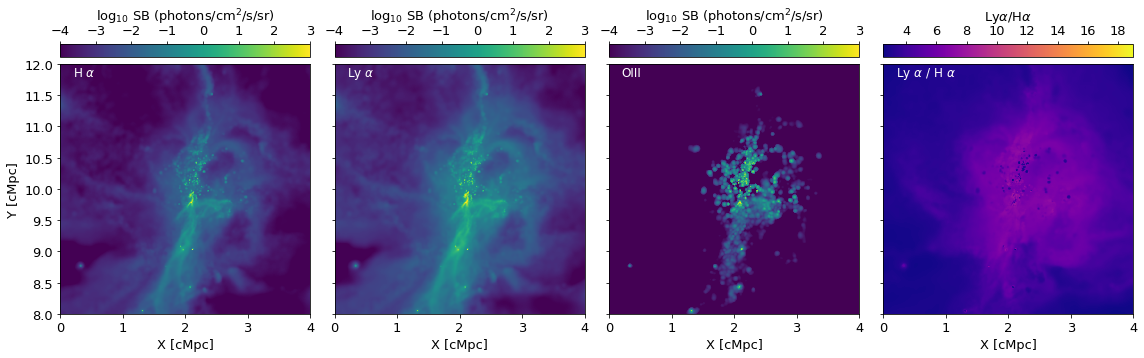

In [18]:
fig,(ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(16,16))

Vmin=-4; Vmax=3

colmap='viridis'

pltimg(datahalpha[0:4./12.5*4000.,8./12.5*4000.:12./12.5*4000.],ax1,[0,8],[4,4],label=None,colmap = colmap,colorbar=True,labelaxes=True,
       Vmin=Vmin,Vmax=Vmax)
plt.text(0.05,0.95,r'H $\alpha$',transform=ax1.transAxes,\
         horizontalalignment='left',color='white',fontsize=12)

pltimg(datalyalpha[0:4./12.5*4000.,8./12.5*4000.:12./12.5*4000.],ax2,[0,8],[4,4],label=None,colmap = colmap,colorbar=True,labelaxes=True,
       Vmin=Vmin,Vmax=Vmax)
plt.text(0.05,0.95,r'Ly $\alpha$ ',transform=ax2.transAxes,\
         horizontalalignment='left',color='white',fontsize=12)

pltimg(dataoiii[0:4./12.5*4000.,8./12.5*4000.:12./12.5*4000.],ax3,[0,8],[4,4],label=None,colmap = colmap,colorbar=True,labelaxes=True,
       Vmin=Vmin,Vmax=Vmax)
plt.text(0.05,0.95,r'OIII',transform=ax3.transAxes,horizontalalignment='left',color='white',fontsize=12)

pltimg(10**(datalyalpha[0:4./12.5*4000.,8./12.5*4000.:12./12.5*4000.]-datahalpha[0:4./12.5*4000.,8./12.5*4000.:12./12.5*4000.]),\
       ax4,[0,8],[4,4],label=None,colmap = 'plasma',colorbar=True,labelaxes=True,clabel=r'Ly$\alpha$/H$\alpha$')
plt.text(0.05,0.95,r'Ly $\alpha$ / H $\alpha$',transform=ax4.transAxes,horizontalalignment='left',color='white',fontsize=12)
# log( a/b ) = log(a) - log(b)


ax2.set_yticklabels([])
ax2.set_ylabel('')
ax3.set_yticklabels([])
ax3.set_ylabel('')
ax4.set_yticklabels([])
ax4.set_ylabel('')

fig.subplots_adjust( wspace=0.)

plt.tight_layout()

plt.savefig('EAGLE_LyalphaHalphaOIII.png')